# Python Crash Course: pandas

*Based on [Python Pandas Tutorial](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) from [learndatasci.com](https://www.learndatasci.com/).*


The `pandas` library offers a versatile and robust toolkit for managing and examining massive datasets, including astronomical datasets. With pandas, scientists have access to a range of tools for cleaning, preprocessing, analyzing, and visualizing complex data, making it an essential tool in the field. I warmly recommend you to use it! :)

Let's import `pandas`!

In [1]:
import pandas as pd

The primary two components of pandas are the `Series` and `DataFrame`.

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`.  

<br>
<br>
<div>
<img src="assets/series-and-dataframe.width-1200.png" width="700"/>
</div>

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below.

## Creating DataFrames from scratch

There are many ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`.

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [142]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data)

In [143]:
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Each (*key*, *value*) item in `data` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame.

Let's have customer names as our index:

In [144]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


So now we could **loc**ate a customer's order by using their name:

In [145]:
purchases.loc['June', :]  # purchases.loc['June'] also works when we have defined index

apples     3
oranges    0
Name: June, dtype: int64

We can also access individual columns or even individual measurments using `loc`:

In [146]:
purchases.loc[:,'apples']         # display contets of column 'apples'
purchases.loc['David', :]         # display contets of row 'David'
purchases.loc['David', 'apples']  # display how many apples David purchased

1

## How to read in data

It’s quite simple to load data from various file formats into a DataFrame. We already seen this in previous notebook. The most common files you will encounter are `.csv` files, but you can also read in `.fit`, `.txt`, `.json` and various other file formats. 

In [147]:
df = pd.read_csv("data/df_example.csv")

In [148]:
df

,LBHB,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LOI6300,EW_OI6300,LNHB,EW_NHB,LFEII4570,L5100,RFeII
0,42.407484,4035.120137,62.283636,43.052478,4035.120137,373.069436,42.742504,139.636871,503.777872,42.009440,...,12.331427,41.511143,10.930287,41.365787,7.424635,41.425507,6.492263,40.875145,44.295467,0.027067
1,43.250943,4001.867514,92.106680,43.692402,3644.666146,384.805717,42.706794,27.607500,571.000011,42.534647,...,1.842283,41.360178,1.837861,41.270256,1.390507,41.832887,3.517503,41.737318,44.960481,0.027648
2,41.689452,4022.799923,39.853035,42.539311,4022.799923,469.771728,41.778188,51.401231,406.628367,41.034827,...,8.242873,40.707623,7.199192,40.772832,7.503642,40.897581,6.435633,40.333683,43.761380,0.039767
3,41.758984,4036.493476,69.567421,42.328024,4101.341821,429.324444,41.347842,28.369630,387.717483,41.423658,...,11.508074,40.420142,5.541201,40.206904,3.030926,40.834453,8.273793,40.102237,43.679281,0.019762
4,42.032971,4040.000081,104.402030,42.364693,2844.338435,373.248050,41.167325,14.956803,379.199711,40.895319,...,3.078586,40.262384,3.067416,39.872728,1.121750,40.214437,1.585532,40.830800,43.686652,0.056409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,42.104948,12616.040613,123.793899,42.500562,7650.012037,511.650871,41.853934,72.877826,640.632865,41.450977,...,12.475346,40.758150,9.670123,39.768880,0.884141,40.839375,6.705733,41.570024,43.767137,0.260379
1911,42.619541,12566.913094,88.915217,43.022049,9686.744974,374.154044,41.437011,6.140758,340.636266,41.740283,...,2.788683,40.875734,2.778565,40.981401,3.178828,41.029708,2.286352,42.021424,44.342954,0.228217
1912,41.981075,12912.927383,120.589420,42.451622,6129.011754,592.728473,41.748118,74.092183,412.852987,41.434221,...,12.991350,40.815551,14.310527,40.713628,10.114450,40.702614,6.346127,40.944270,43.674696,0.082176
1913,42.451566,12766.764724,124.867244,42.912117,10691.902656,600.573867,41.793206,28.831365,457.893545,41.416923,...,6.382401,40.919871,6.359244,40.350819,1.538623,40.583940,1.693646,41.435528,44.027507,0.085852


## Selecting data from a DataFrame

You will usually have numerical index for rows (like in this table) instead of descriptive one like in the previous example, while columns usually have descriptive index. So, in this case:

- to select individual rows use `iloc`
- to select individual columns use `loc`

In [149]:
df.iloc[:5]

,LBHB,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LOI6300,EW_OI6300,LNHB,EW_NHB,LFEII4570,L5100,RFeII
0,42.407484,4035.120137,62.283636,43.052478,4035.120137,373.069436,42.742504,139.636871,503.777872,42.009440,...,12.331427,41.511143,10.930287,41.365787,7.424635,41.425507,6.492263,40.875145,44.295467,0.027067
1,43.250943,4001.867514,92.106680,43.692402,3644.666146,384.805717,42.706794,27.607500,571.000011,42.534647,...,1.842283,41.360178,1.837861,41.270256,1.390507,41.832887,3.517503,41.737318,44.960481,0.027648
2,41.689452,4022.799923,39.853035,42.539311,4022.799923,469.771728,41.778188,51.401231,406.628367,41.034827,...,8.242873,40.707623,7.199192,40.772832,7.503642,40.897581,6.435633,40.333683,43.761380,0.039767
3,41.758984,4036.493476,69.567421,42.328024,4101.341821,429.324444,41.347842,28.369630,387.717483,41.423658,...,11.508074,40.420142,5.541201,40.206904,3.030926,40.834453,8.273793,40.102237,43.679281,0.019762
4,42.032971,4040.000081,104.402030,42.364693,2844.338435,373.248050,41.167325,14.956803,379.199711,40.895319,...,3.078586,40.262384,3.067416,39.872728,1.121750,40.214437,1.585532,40.830800,43.686652,0.056409


In [150]:
df.loc[:,'FWHM_BHB']

0        4035.120137
1        4001.867514
2        4022.799923
3        4036.493476
4        4040.000081
            ...     
1910    12616.040613
1911    12566.913094
1912    12912.927383
1913    12766.764724
1914    13106.910796
Name: FWHM_BHB, Length: 1915, dtype: float64

You can use `loc` to select specific row and column:

In [151]:
df.loc[3,'LBHA']

42.3280240356043

...or row and several columns:

In [152]:
df.loc[3, ['LBHA', 'FWHM_BHB', 'L5100']]

LBHA          42.328024
FWHM_BHB    4036.493476
L5100         43.679281
Name: 3, dtype: float64

Often, you will need to select a subsample of columns of your parent sample, and you can do it like this:

In [153]:
df.loc[:,['LBHA', 'FWHM_BHB', 'L5100']]

,LBHA,FWHM_BHB,L5100
0,43.052478,4035.120137,44.295467
1,43.692402,4001.867514,44.960481
2,42.539311,4022.799923,43.761380
3,42.328024,4036.493476,43.679281
4,42.364693,4040.000081,43.686652
...,...,...,...
1910,42.500562,12616.040613,43.767137
1911,43.022049,12566.913094,44.342954
1912,42.451622,12912.927383,43.674696
1913,42.912117,12766.764724,44.027507


In [154]:
# also like this (more common way)

df[['LBHA', 'FWHM_BHB', 'L5100']]

,LBHA,FWHM_BHB,L5100
0,43.052478,4035.120137,44.295467
1,43.692402,4001.867514,44.960481
2,42.539311,4022.799923,43.761380
3,42.328024,4036.493476,43.679281
4,42.364693,4040.000081,43.686652
...,...,...,...
1910,42.500562,12616.040613,43.767137
1911,43.022049,12566.913094,44.342954
1912,42.451622,12912.927383,43.674696
1913,42.912117,12766.764724,44.027507


## Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LBHB           1915 non-null   float64
 1   FWHM_BHB       1910 non-null   float64
 2   EW_BHB         1910 non-null   float64
 3   LBHA           1893 non-null   float64
 4   FWHM_BHA       1893 non-null   float64
 5   EW_BHA         1893 non-null   float64
 6   LOIII5007      1890 non-null   float64
 7   EW_OIII5007    1890 non-null   float64
 8   FWHM_OIII5007  1890 non-null   float64
 9   LNHA           1890 non-null   float64
 10  FWHM_NHA       1890 non-null   float64
 11  EW_NHA         1910 non-null   float64
 12  LNII6583       1910 non-null   float64
 13  EW_NII6583     1910 non-null   float64
 14  LSII6716       1910 non-null   float64
 15  EW_SII6716     1812 non-null   float64
 16  LSII6731       1792 non-null   float64
 17  EW_SII6731     1784 non-null   float64
 18  LOI6300 

`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.

Note that we have some null values in our data set.

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns):

In [156]:
df.shape

(1915, 25)

If you want to see all of the columns you have in the DataFrame:

In [157]:
df.columns

Index(['LBHB', 'FWHM_BHB', 'EW_BHB', 'LBHA', 'FWHM_BHA', 'EW_BHA', 'LOIII5007',
       'EW_OIII5007', 'FWHM_OIII5007', 'LNHA', 'FWHM_NHA', 'EW_NHA',
       'LNII6583', 'EW_NII6583', 'LSII6716', 'EW_SII6716', 'LSII6731',
       'EW_SII6731', 'LOI6300', 'EW_OI6300', 'LNHB', 'EW_NHB', 'LFEII4570',
       'L5100', 'RFeII'],
      dtype='object')

You can change the column names using this metadata:

In [158]:
df.columns = ['LBHB_changed', 'FWHM_BHB', 'EW_BHB', 'LBHA', 'FWHM_BHA', 'EW_BHA', 'LOIII5007',
       'EW_OIII5007', 'FWHM_OIII5007', 'LNHA', 'FWHM_NHA', 'EW_NHA',
       'LNII6583', 'EW_NII6583', 'LSII6716', 'EW_SII6716', 'LSII6731',
       'EW_SII6731', 'LOI6300', 'EW_OI6300', 'LNHB', 'EW_NHB', 'LFEII4570',
       'L5100', 'RFeII']

In [159]:
df.head(10)  # outputs first 10 rows of a DataFrame

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LOI6300,EW_OI6300,LNHB,EW_NHB,LFEII4570,L5100,RFeII
0,42.407484,4035.120137,62.283636,43.052478,4035.120137,373.069436,42.742504,139.636871,503.777872,42.009440,...,12.331427,41.511143,10.930287,41.365787,7.424635,41.425507,6.492263,40.875145,44.295467,0.027067
1,43.250943,4001.867514,92.106680,43.692402,3644.666146,384.805717,42.706794,27.607500,571.000011,42.534647,...,1.842283,41.360178,1.837861,41.270256,1.390507,41.832887,3.517503,41.737318,44.960481,0.027648
2,41.689452,4022.799923,39.853035,42.539311,4022.799923,469.771728,41.778188,51.401231,406.628367,41.034827,...,8.242873,40.707623,7.199192,40.772832,7.503642,40.897581,6.435633,40.333683,43.761380,0.039767
3,41.758984,4036.493476,69.567421,42.328024,4101.341821,429.324444,41.347842,28.369630,387.717483,41.423658,...,11.508074,40.420142,5.541201,40.206904,3.030926,40.834453,8.273793,40.102237,43.679281,0.019762
4,42.032971,4040.000081,104.402030,42.364693,2844.338435,373.248050,41.167325,14.956803,379.199711,40.895319,...,3.078586,40.262384,3.067416,39.872728,1.121750,40.214437,1.585532,40.830800,43.686652,0.056409
5,41.480248,4011.572982,96.399866,42.011087,2688.182106,545.106287,40.971030,31.378636,230.501270,40.178703,...,3.262078,39.769436,3.250242,39.577012,1.871849,39.813238,2.075231,40.399054,43.168561,0.072881
6,41.901500,4033.518392,106.570227,42.495397,3314.047216,697.515189,41.431856,38.041951,318.987235,41.170200,...,4.841867,40.246112,4.100140,39.889859,1.614080,40.426903,3.575849,41.044808,43.589279,0.124655
7,40.853304,4033.948441,59.442957,41.711283,3223.569766,326.813414,40.702041,40.415623,530.891884,40.482609,...,8.375829,39.852995,4.486062,40.265283,11.967491,39.930043,7.104601,39.971933,42.866350,0.145329
8,41.688491,4025.915693,95.460767,42.170408,3742.443228,482.982799,41.122996,27.306123,325.977180,41.265006,...,14.130415,40.483430,10.362960,39.996120,3.015672,40.589630,7.608582,40.829794,43.444540,0.124080
9,42.860236,4020.379434,91.430675,43.370421,4104.246540,457.713410,42.024525,14.019867,677.000014,41.687721,...,2.571428,41.106418,2.564634,40.850883,1.315588,41.121936,1.670289,42.230566,44.572202,0.210242


In [160]:
df.tail() # outputs last 5 rows

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LOI6300,EW_OI6300,LNHB,EW_NHB,LFEII4570,L5100,RFeII
1910,42.104948,12616.040613,123.793899,42.500562,7650.012037,511.650871,41.853934,72.877826,640.632865,41.450977,...,12.475346,40.758150,9.670123,39.768880,0.884141,40.839375,6.705733,41.570024,43.767137,0.260379
1911,42.619541,12566.913094,88.915217,43.022049,9686.744974,374.154044,41.437011,6.140758,340.636266,41.740283,...,2.788683,40.875734,2.778565,40.981401,3.178828,41.029708,2.286352,42.021424,44.342954,0.228217
1912,41.981075,12912.927383,120.589420,42.451622,6129.011754,592.728473,41.748118,74.092183,412.852987,41.434221,...,12.991350,40.815551,14.310527,40.713628,10.114450,40.702614,6.346127,40.944270,43.674696,0.082176
1913,42.451566,12766.764724,124.867244,42.912117,10691.902656,600.573867,41.793206,28.831365,457.893545,41.416923,...,6.382401,40.919871,6.359244,40.350819,1.538623,40.583940,1.693646,41.435528,44.027507,0.085852
1914,41.911892,13106.910796,118.803849,42.324453,10790.199747,505.592572,42.434070,411.640172,588.308086,42.080725,...,90.261449,40.209780,4.063010,41.205971,36.009636,41.447907,40.435684,41.146257,43.619125,0.152176


## Removing null values

Often, the data that you download from SDSS (or other sky surveys) will have missing values. For example, high redshift quasar doesent have $H\alpha$ line covered anymore due to Doppler shift, but has some other measurments intact, etc. In this case, you will need to make a decision whether you would like to keep the data for that quasar or drop it altogether.

Here, we use `isna` to check how many missing values each column has:

In [161]:
df.isna().sum()

LBHB_changed        0
FWHM_BHB            5
EW_BHB              5
LBHA               22
FWHM_BHA           22
EW_BHA             22
LOIII5007          25
EW_OIII5007        25
FWHM_OIII5007      25
LNHA               25
FWHM_NHA           25
EW_NHA              5
LNII6583            5
EW_NII6583          5
LSII6716            5
EW_SII6716        103
LSII6731          123
EW_SII6731        131
LOI6300          1008
EW_OI6300        1008
LNHB              123
EW_NHB             25
LFEII4570          25
L5100              17
RFeII               9
dtype: int64

In this case, we could think about dropping the $[OI] \ \lambda6300$ line data altogether because it has the most nan values. Besides that, we can drop all other rows with nan values. Note that if we would drop all nan values from $[OI] \ \lambda6300$ line, we would have a significantly smaller data set. When working with data, you will often need to make these kinds of compromises.

In [162]:
# first we delete the EW_OI6300 and LOI6300 columns

# df.drop() # this will only return a VIEW of the dataset without OI columns (original data will be intact)

df.drop(columns=['EW_OI6300', 'LOI6300'], inplace=True) # or: df = df.drop(columns=['EW_OI6300', 'LOI6300'])

In [163]:
df.isna().sum()

LBHB_changed       0
FWHM_BHB           5
EW_BHB             5
LBHA              22
FWHM_BHA          22
EW_BHA            22
LOIII5007         25
EW_OIII5007       25
FWHM_OIII5007     25
LNHA              25
FWHM_NHA          25
EW_NHA             5
LNII6583           5
EW_NII6583         5
LSII6716           5
EW_SII6716       103
LSII6731         123
EW_SII6731       131
LNHB             123
EW_NHB            25
LFEII4570         25
L5100             17
RFeII              9
dtype: int64

In [164]:
# now, we can delete all columns with missing values

df.dropna(inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 0 to 1914
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LBHB_changed   1744 non-null   float64
 1   FWHM_BHB       1744 non-null   float64
 2   EW_BHB         1744 non-null   float64
 3   LBHA           1744 non-null   float64
 4   FWHM_BHA       1744 non-null   float64
 5   EW_BHA         1744 non-null   float64
 6   LOIII5007      1744 non-null   float64
 7   EW_OIII5007    1744 non-null   float64
 8   FWHM_OIII5007  1744 non-null   float64
 9   LNHA           1744 non-null   float64
 10  FWHM_NHA       1744 non-null   float64
 11  EW_NHA         1744 non-null   float64
 12  LNII6583       1744 non-null   float64
 13  EW_NII6583     1744 non-null   float64
 14  LSII6716       1744 non-null   float64
 15  EW_SII6716     1744 non-null   float64
 16  LSII6731       1744 non-null   float64
 17  EW_SII6731     1744 non-null   float64
 18  LNHB    

## Understanding your variables

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [166]:
df.describe()

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_NII6583,LSII6716,EW_SII6716,LSII6731,EW_SII6731,LNHB,EW_NHB,LFEII4570,L5100,RFeII
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,...,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,41.921734,5875.590752,76.423636,42.477911,4931.464755,395.527139,41.640648,52.434910,432.828062,41.326251,...,23.343146,40.703058,9.096585,40.562161,7.320679,40.627750,5.458004,41.266715,43.788106,0.300298
std,0.556866,1729.914638,35.001495,0.511647,1546.275813,174.653920,0.507316,55.675746,139.067894,0.460861,...,22.298019,0.410572,8.735223,0.556822,7.671623,0.502950,6.578004,0.651357,0.481914,0.215039
min,40.075757,4000.000080,10.278067,40.457697,1306.648683,12.994265,39.553521,3.071161,170.886013,39.858900,...,0.179127,39.254393,0.216828,38.347468,0.119906,38.708658,0.026295,38.692892,42.543006,0.000968
25%,41.567508,4595.805287,52.705119,42.145739,3886.394094,268.605780,41.307102,21.961494,340.729266,41.019708,...,8.763379,40.422496,3.260905,40.300633,2.204563,40.297875,1.928266,40.847842,43.446222,0.136751
50%,41.964039,5393.207232,72.552408,42.506638,4581.865741,377.739387,41.662726,36.640513,404.940016,41.355649,...,17.325930,40.722503,6.792333,40.643844,5.151798,40.678509,3.793935,41.300585,43.808465,0.251719
75%,42.305556,6568.895153,94.982861,42.827367,5701.333611,503.801464,41.973538,63.846361,498.713128,41.651047,...,31.089194,40.990502,12.278524,40.932985,9.771767,40.973605,7.066142,41.723229,44.141231,0.416128
max,43.250943,13106.910796,452.260468,43.767512,12276.511508,900.737241,43.307362,670.781758,1911.984083,42.802847,...,290.802166,42.102143,96.802311,42.102143,95.285252,42.280171,121.585097,42.977285,44.973555,1.375277


## Relationships between continuous variables

By using the correlation method .corr() we can generate the relationship between each continuous variable:

In [167]:
df.corr()

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_NII6583,LSII6716,EW_SII6716,LSII6731,EW_SII6731,LNHB,EW_NHB,LFEII4570,L5100,RFeII
LBHB_changed,1.000000,0.132006,0.386306,0.965732,0.062734,0.202418,0.764125,-0.144860,0.384278,0.637597,...,-0.371926,0.569199,-0.385779,0.534713,-0.314071,0.588066,-0.271568,0.765368,0.919477,-0.185993
FWHM_BHB,0.132006,1.000000,0.180366,0.136066,0.792181,0.173121,0.075328,0.031064,0.108308,0.029319,...,-0.019979,0.048789,-0.006865,-0.033760,-0.062255,0.040274,0.004350,-0.024472,0.065180,-0.211327
EW_BHB,0.386306,0.180366,1.000000,0.333383,0.036219,0.698098,0.199564,0.229492,0.173184,0.051279,...,0.014678,0.091327,0.030773,0.037453,-0.007041,0.076852,0.130177,0.201260,0.085137,-0.272403
LBHA,0.965732,0.136066,0.333383,1.000000,0.114748,0.271810,0.805175,-0.075615,0.397691,0.675705,...,-0.334750,0.612177,-0.337097,0.555914,-0.270160,0.628203,-0.206079,0.730675,0.901943,-0.170573
FWHM_BHA,0.062734,0.792181,0.036219,0.114748,1.000000,0.132308,0.076282,0.044759,0.088982,0.068798,...,0.052339,0.071809,0.035142,0.010502,0.003557,0.028597,0.001411,-0.035003,0.050290,-0.123801
EW_BHA,0.202418,0.173121,0.698098,0.271810,0.132308,1.000000,0.179236,0.292667,0.098900,0.043724,...,0.196765,0.094243,0.256579,-0.016484,0.207140,0.076660,0.139678,0.060328,-0.060937,-0.220214
LOIII5007,0.764125,0.075328,0.199564,0.805175,0.076282,0.179236,1.000000,0.333888,0.312200,0.803909,...,-0.037526,0.775332,-0.015157,0.679579,0.034878,0.803784,0.103725,0.544509,0.747136,-0.186694
EW_OIII5007,-0.144860,0.031064,0.229492,-0.075615,0.044759,0.292667,0.333888,1.000000,0.013439,0.219561,...,0.574861,0.288689,0.641070,0.176956,0.560282,0.283635,0.809495,-0.187496,-0.216670,-0.090600
FWHM_OIII5007,0.384278,0.108308,0.173184,0.397691,0.088982,0.098900,0.312200,0.013439,1.000000,0.290705,...,0.007068,0.324504,-0.037616,0.257732,-0.034640,0.223796,-0.035677,0.319220,0.365161,-0.005398
LNHA,0.637597,0.029319,0.051279,0.675705,0.068798,0.043724,0.803909,0.219561,0.290705,1.000000,...,0.110994,0.819039,0.078174,0.694743,0.106382,0.921744,0.237039,0.499210,0.692042,-0.082885


Another handy code snippet which allows to make a good looking correlation matrix using `pandas`, `matplolib` and `seaborn` packages:

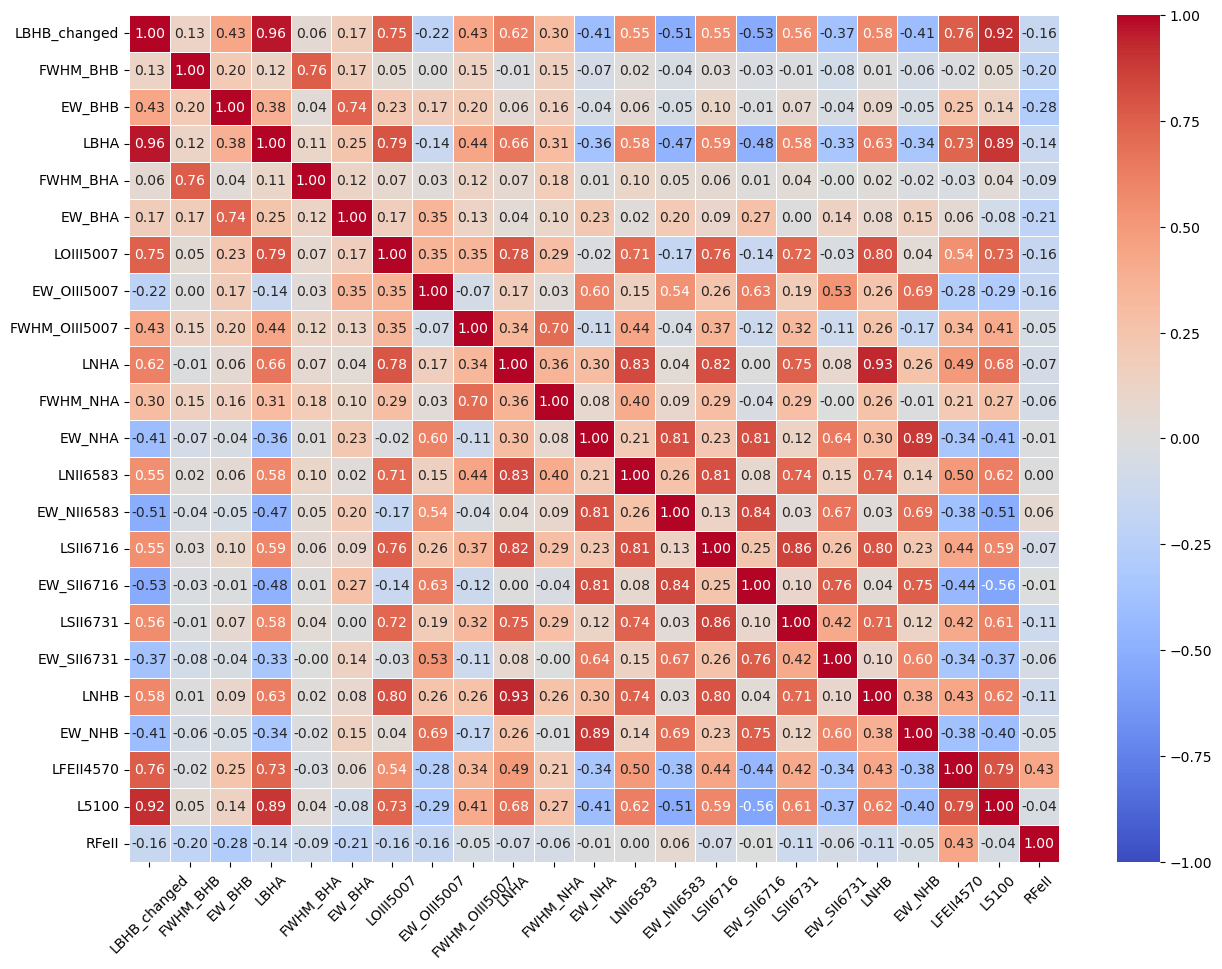

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(15,11))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

## Conditional selections

We can select data from DataFrame not only by columns or indices, but also using conditionals:

In [169]:
# we need to use bitwise operators (instead of boolean operators) when we compare DataFrames: 
# & --> and
# | --> or
# ~ --> not

condition = (df['FWHM_BHB'] > 7000) & (df['L5100'] < 43)
df[condition]

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_NII6583,LSII6716,EW_SII6716,LSII6731,EW_SII6731,LNHB,EW_NHB,LFEII4570,L5100,RFeII
1557,40.435646,7081.899001,27.853735,41.352092,8559.145906,150.260786,40.650347,42.729278,366.742561,40.535479,...,23.829534,40.215610,10.812743,38.976437,0.622397,39.874135,7.559051,39.943338,42.780296,0.364274
1568,40.619914,7318.264304,28.564261,41.529300,8758.892734,168.748855,40.750484,36.899256,375.057296,40.669622,...,31.055567,40.282777,9.449854,38.950667,0.439382,40.036314,7.453869,39.585715,42.943545,0.103351
1571,40.571476,7241.185173,36.693625,41.505924,3704.959407,316.809091,40.860868,70.841551,550.315679,40.393856,...,19.982537,39.931151,8.496164,38.929374,0.846745,39.619845,4.099615,39.676118,42.762006,0.130419
1576,40.480161,7329.593610,20.176518,41.402008,7329.593610,168.750485,41.089501,81.281528,371.894324,40.776168,...,24.866654,40.398645,16.894891,40.303490,13.580193,40.170500,9.873376,39.605944,42.937472,0.136763
1587,41.193953,7203.060221,81.836000,41.643733,6078.923312,383.013402,40.998495,54.644543,277.135110,40.537733,...,32.006734,40.120630,11.928920,38.702418,0.457003,39.810264,3.369421,40.453933,42.989174,0.162244
1598,41.358886,7252.000146,359.144168,42.038772,3715.000282,465.500900,41.688494,670.781758,351.938379,41.552366,...,149.875644,41.012933,40.822975,39.586310,1.517178,40.876229,121.585097,40.773788,42.681791,0.391441
1623,40.702935,7395.563649,50.774661,41.480500,4747.508193,222.257861,40.668702,45.018485,381.904925,40.223587,...,18.119848,39.978038,6.892789,38.697708,0.360900,39.593693,3.940717,40.111116,42.762075,0.282355
1674,41.092614,7960.096363,92.444521,41.759882,4226.183799,329.463964,40.855670,51.884335,487.536671,40.657139,...,21.943431,40.114146,7.388625,39.038849,0.620733,40.189186,11.635662,39.469987,42.898350,0.026529
1716,40.604723,8029.378291,32.598945,41.267469,5893.976629,108.705964,39.716522,4.015205,170.886013,40.155918,...,8.219168,39.936473,5.007985,39.898769,4.586544,38.887291,0.622333,39.870758,42.879259,0.205347
1719,41.043475,8155.031667,75.596132,41.770857,4123.440335,369.256797,40.750654,37.765096,197.723296,40.333641,...,5.893348,40.036500,6.825676,39.954612,5.654422,39.758879,3.928235,40.397676,42.927230,0.238976


## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. 

In [170]:
# we can define a custom function
def power(base, exponent=2):
    return base**exponent


df["EW_BHB_squared"] = df["EW_BHB"].apply(power)

df.head()

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,LSII6716,EW_SII6716,LSII6731,EW_SII6731,LNHB,EW_NHB,LFEII4570,L5100,RFeII,EW_BHB_squared
0,42.407484,4035.120137,62.283636,43.052478,4035.120137,373.069436,42.742504,139.636871,503.777872,42.009440,...,41.562769,12.331427,41.511143,10.930287,41.425507,6.492263,40.875145,44.295467,0.027067,3879.251372
1,43.250943,4001.867514,92.106680,43.692402,3644.666146,384.805717,42.706794,27.607500,571.000011,42.534647,...,41.360178,1.842283,41.360178,1.837861,41.832887,3.517503,41.737318,44.960481,0.027648,8483.640546
2,41.689452,4022.799923,39.853035,42.539311,4022.799923,469.771728,41.778188,51.401231,406.628367,41.034827,...,40.764839,8.242873,40.707623,7.199192,40.897581,6.435633,40.333683,43.761380,0.039767,1588.264398
3,41.758984,4036.493476,69.567421,42.328024,4101.341821,429.324444,41.347842,28.369630,387.717483,41.423658,...,40.738901,11.508074,40.420142,5.541201,40.834453,8.273793,40.102237,43.679281,0.019762,4839.626054
4,42.032971,4040.000081,104.402030,42.364693,2844.338435,373.248050,41.167325,14.956803,379.199711,40.895319,...,40.262384,3.078586,40.262384,3.067416,40.214437,1.585532,40.830800,43.686652,0.056409,10899.783886


Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

In [171]:
# or we can use functions from numpy

df["EW_BHB_sqrt"] = df["EW_BHB"].apply(np.sqrt)

In [172]:
df.head()

,LBHB_changed,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LNHB,EW_NHB,LFEII4570,L5100,RFeII,EW_BHB_squared,EW_BHB_sqrt
0,42.407484,4035.120137,62.283636,43.052478,4035.120137,373.069436,42.742504,139.636871,503.777872,42.009440,...,12.331427,41.511143,10.930287,41.425507,6.492263,40.875145,44.295467,0.027067,3879.251372,7.891998
1,43.250943,4001.867514,92.106680,43.692402,3644.666146,384.805717,42.706794,27.607500,571.000011,42.534647,...,1.842283,41.360178,1.837861,41.832887,3.517503,41.737318,44.960481,0.027648,8483.640546,9.597223
2,41.689452,4022.799923,39.853035,42.539311,4022.799923,469.771728,41.778188,51.401231,406.628367,41.034827,...,8.242873,40.707623,7.199192,40.897581,6.435633,40.333683,43.761380,0.039767,1588.264398,6.312926
3,41.758984,4036.493476,69.567421,42.328024,4101.341821,429.324444,41.347842,28.369630,387.717483,41.423658,...,11.508074,40.420142,5.541201,40.834453,8.273793,40.102237,43.679281,0.019762,4839.626054,8.340709
4,42.032971,4040.000081,104.402030,42.364693,2844.338435,373.248050,41.167325,14.956803,379.199711,40.895319,...,3.078586,40.262384,3.067416,40.214437,1.585532,40.830800,43.686652,0.056409,10899.783886,10.217731


## Brief plotting

https://pandas.pydata.org/docs/user_guide/visualization.html

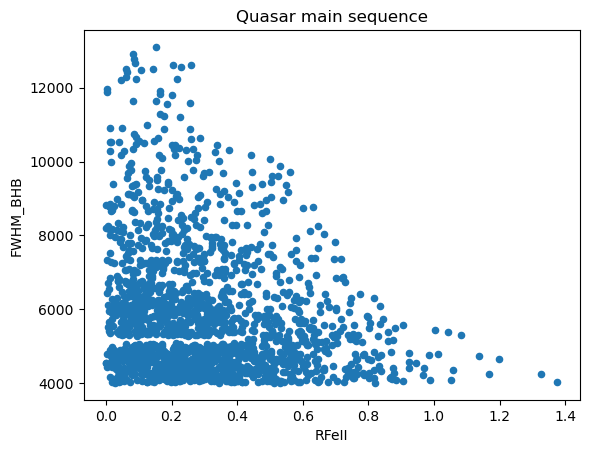

In [173]:
df.plot(kind='scatter', x='RFeII', y='FWHM_BHB', title='Quasar main sequence');

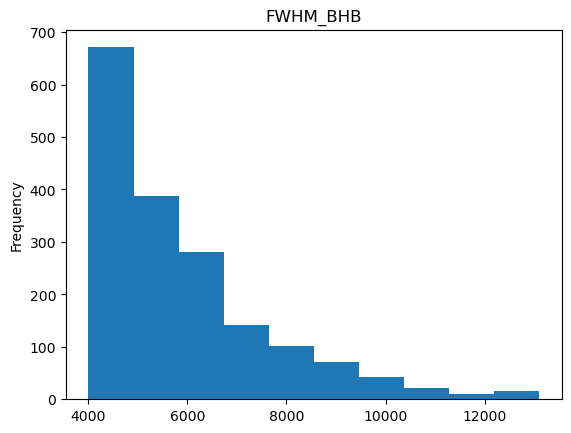

In [174]:
df['FWHM_BHB'].plot(kind='hist', title='FWHM_BHB');